In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
root = '/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/'

In [ ]:
cols = ['AIR_TEMP', 'WIND_SPEED', 'ATMO_PRESSURE', 'HUMIDITY', 'RAIN_FALL']
colname = ['AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'ATMO_PRESSURE(hpa)','HUMIDITY(%)', 'RAIN_FALL(mm)']
corr_colname = ['Air Temperature (°C)', 'Wind Speed (m/s)', 'Atmospheric Pressure (hpa)','Humidity (%)', 'Rainfall (mm)']

In [17]:
def run_Generator(datestart, dateend, idx):
#   #####################################################
#   ## Loading & Getting predictions from model
#   #####################################################
  df = pd.read_csv(root+'corrected/west_bengal.csv')
  date_samples = df.loc[(df['DATE']>=datestart) & (df['DATE']<=dateend)]['DATE']
  datelist = df['DATE']
  df['DATE']= pd.to_datetime(df['DATE'])
  df = df.drop(columns='DATE')
  training_set = df
  sc = StandardScaler()
  training_set_scaled = sc.fit_transform(training_set)
  sc_predict = StandardScaler()
  sc_predict.fit_transform(training_set.iloc[:, idx:idx+1])
  X_train = []
  y_train = []
  n_future = 1   
  n_past = 60   
  for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:df.shape[1]])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, idx])
  X_train, y_train = np.array(X_train), np.array(y_train)
  model = tf.keras.models.load_model(root+'ISRO_MODE/'+cols[idx]+'.h5')
  predictions_train = model.predict(X_train[n_past:])
  y_pred_train = sc_predict.inverse_transform(predictions_train)
  df['DATE'] = datelist 
  y_pred_train[0:].reshape(-1).shape
  hypermodel = tf.keras.models.load_model(root+'ISRO_MODE/SCALERS/'+cols[idx]+'.h5')
  predictions = hypermodel.predict(y_pred_train[0:])
  ########################################################
  PREDICTION_TRAIN = pd.DataFrame(predictions, columns=[colname[idx]]).set_index(pd.Series(datelist[2 * n_past + n_future -1:]))
  df_samples = pd.DataFrame(columns=['DATETIME', 'ACTUAL '+colname[idx], 'PREDICTED '+colname[idx]])
  for x in tqdm(date_samples):
    act = df.loc[df['DATE'] == x][colname[idx]].tolist()[0]
    predic = PREDICTION_TRAIN.loc[x][colname[idx]]
    df_samples.loc[len(df_samples.index)] = [x, act, predic] 
  ax = df_samples.set_index('DATETIME')[['ACTUAL '+colname[idx], 'PREDICTED '+colname[idx]]].plot()
  plt.xlabel(corr_colname[idx], fontsize = 15)
  plt.ylabel('Time', fontsize = 15)
  plt.title('Variation of ' + corr_colname[idx] + ' for Date - ' + datestart , fontsize = 15)
  # plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
  # plt.savefig(root+'ISRO_MODE/FINAL/'+cols[idx]+'_'+ datestart+'_'+dateend +'.png')
  # overwrite = 'a'
  # if idx == 0:
  #   overwrite = 'w'
  # df_samples.to_csv(root + 'isro_data.csv', mode = overwrite, index=False, header=True)

  0%|          | 0/5 [00:00<?, ?it/s]


 20%|██        | 1/5 [00:16<01:04, 16.19s/it]


 40%|████      | 2/5 [00:30<00:45, 15.29s/it]


 60%|██████    | 3/5 [00:45<00:29, 14.89s/it]


 80%|████████  | 4/5 [00:59<00:14, 14.80s/it]


100%|██████████| 5/5 [01:14<00:00, 14.89s/it]


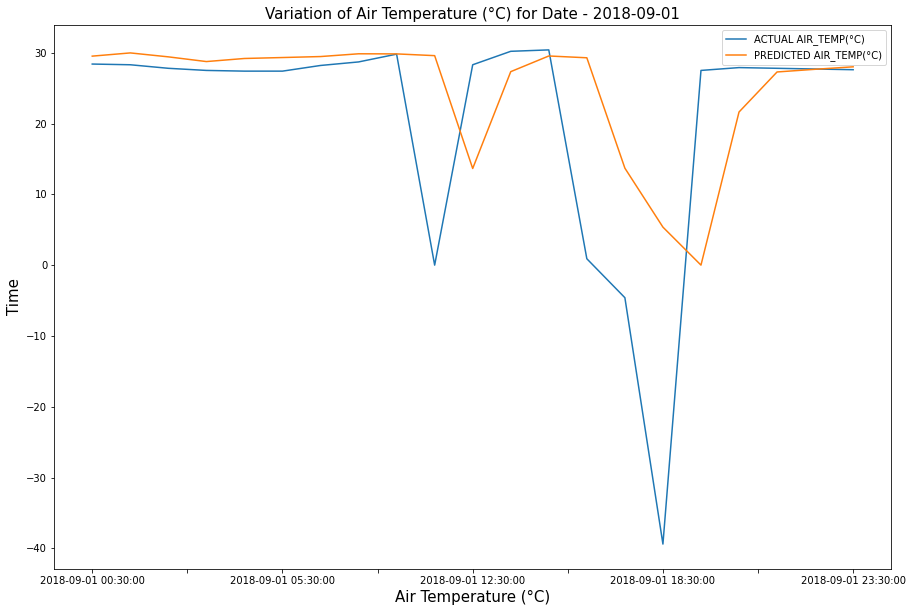

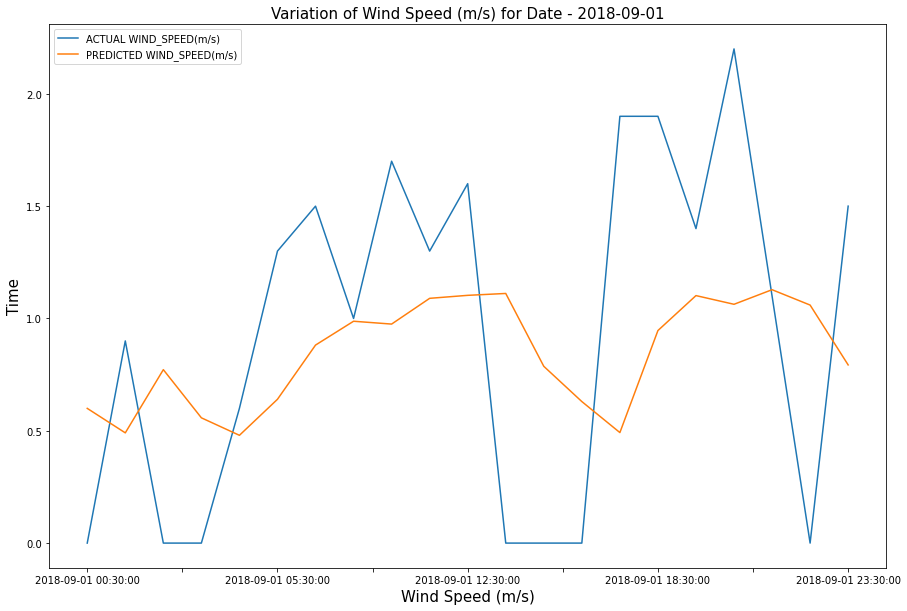

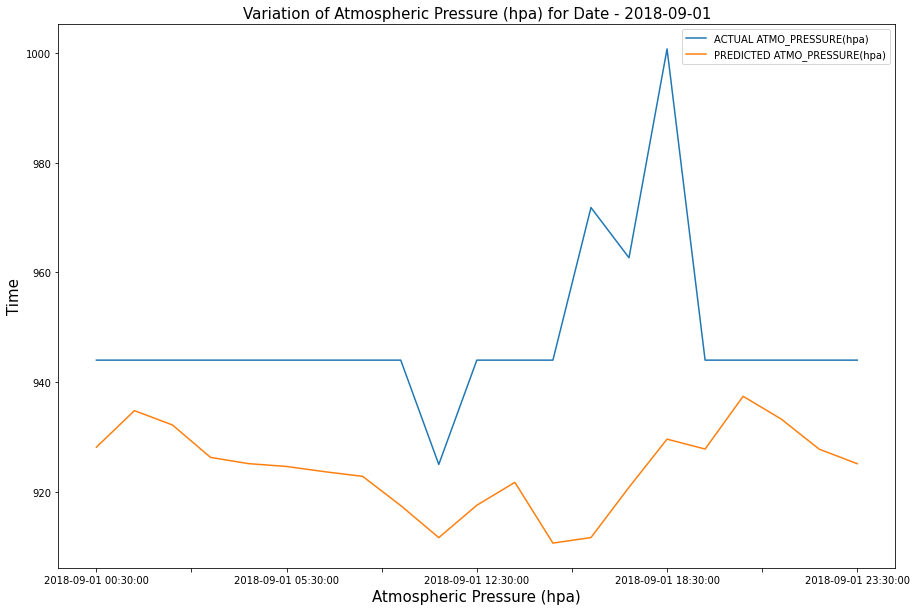

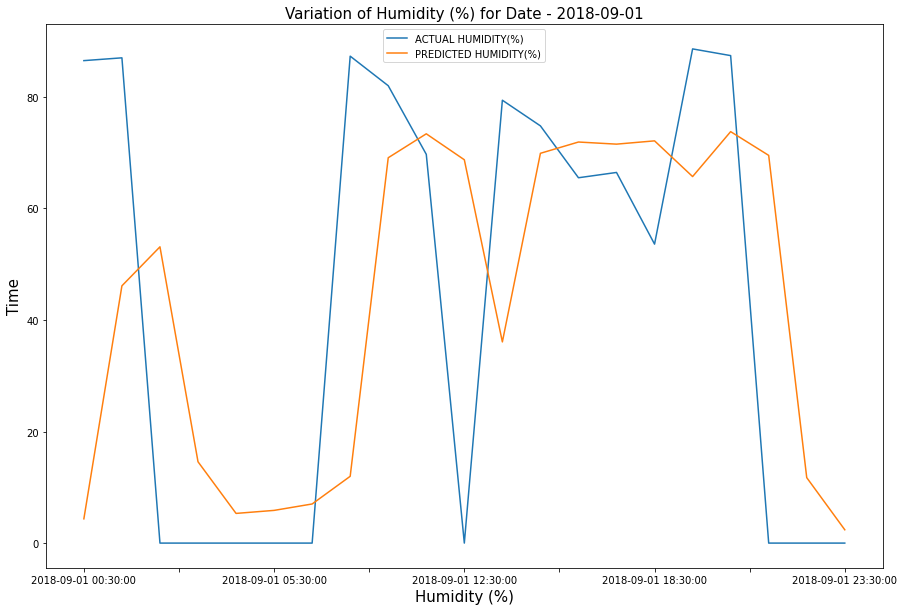

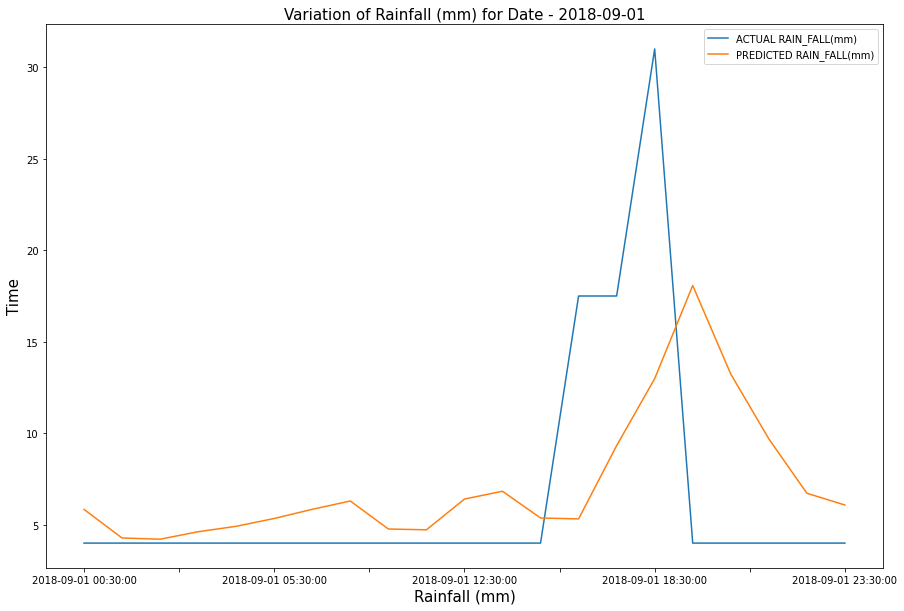

In [18]:
begin = '2018-09-01'
end = '2018-09-02'
for i in tqdm(range(5)):
  print()
  run_Generator(begin, end,i)
  print()

In [ ]:
# hypermodel = tf.keras.models.load_model(root+'ISRO_MODE/SCALERS/'+cols[0]+'.h5')
# tf.keras.utils.plot_model(hypermodel)
# hypermodel.summary()